In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config

In [14]:
import importlib
importlib.reload(_config)


<module '_config' from 'e:\\GitHub\\Wasatch-Choice-Land-Use-And-Transit-Scenario\\_config.py'>

,AreaName,AreaType,Area,TAZID,CO_FIPS,TAZACRES,sqm,acres,geometry
0,Crossroads,City Center,Utah County,2496,49,165.490872,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4..."
1,Crossroads,City Center,Utah County,2503,49,85.734122,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4..."
2,Crossroads,City Center,Utah County,2504,49,146.410140,82.317025,0.020341,"POLYGON ((422640.942 4469115.927, 422641.047 4..."
3,Crossroads,City Center,Utah County,2505,49,76.823967,167718.011467,41.444023,"POLYGON ((422654.105 4469147.185, 422649.306 4..."
4,Crossroads,City Center,Utah County,2498,49,112.631810,268457.440292,66.337278,"POLYGON ((421588.154 4469911.650, 421669.151 4..."
...,...,...,...,...,...,...,...,...,...
1224,Meadowbrook Station,City Center,WFRC MPO,1492,35,45.728115,149005.282516,36.820007,"POLYGON ((424235.616 4505014.079, 424269.116 4..."
1225,Meadowbrook Station,City Center,WFRC MPO,1493,35,50.633831,109626.735660,27.089356,"MULTIPOLYGON (((424462.516 4504848.479, 424705..."
1226,Meadowbrook Station,City Center,WFRC MPO,1494,35,50.381448,108708.827297,26.862536,"POLYGON ((424715.708 4504846.582, 424945.987 4..."
1227,Meadowbrook Station,City Center,WFRC MPO,1495,35,88.369280,93800.997173,23.178731,"POLYGON ((424961.771 4504845.920, 424963.041 4..."


<AxesSubplot:>

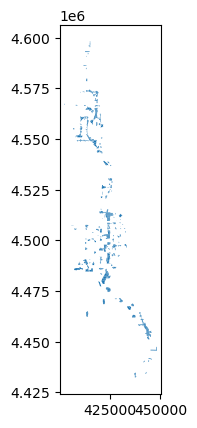

In [3]:
centers_taz_gdf = gpd.read_file('intermediate/centers-taz.geojson')
display(centers_taz_gdf)
centers_taz_gdf.plot()

In [4]:
taz_list = centers_taz_gdf['TAZID'].drop_duplicates()
taz_list

0       2496
1       2503
2       2504
3       2505
4       2498
        ... 
1224    1492
1225    1493
1226    1494
1227    1495
1228    1536
Name: TAZID, Length: 1131, dtype: int64

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4..."
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4..."
2,0,3.0,0.0,867.0,0.0,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((421778.186 4524869.076, 421778.184 4..."
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4..."
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4..."
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4..."
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4..."
712234,0,766664.0,0.0,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423121.651 4483703.060, 423133.545 4..."


<AxesSubplot:>

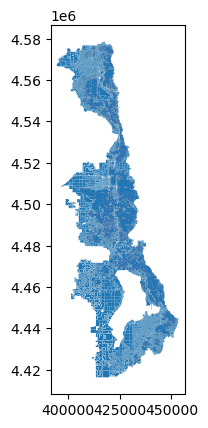

In [5]:
gdf_future_land_use_2050 = gpd.read_file("input/from-josh/future_land_use_2023_2050/future_land_use_2050.shp")
display(gdf_future_land_use_2050)
gdf_future_land_use_2050.plot()

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4..."
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4..."
2,0,3.0,0.0,867.0,0.0,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((421778.186 4524869.076, 421778.184 4..."
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4..."
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4..."
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4..."
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4..."
712234,0,766664.0,0.0,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423121.651 4483703.060, 423133.545 4..."


<AxesSubplot:>

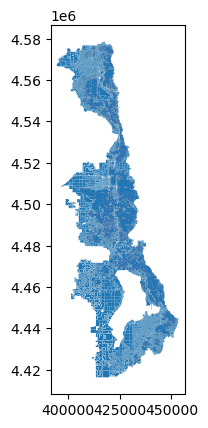

In [6]:
gdf_future_land_use_2023 = gpd.read_file("input/from-josh/future_land_use_2023_2050/future_land_use_2023.shp")
display(gdf_future_land_use_2023)
gdf_future_land_use_2023.plot()

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,...,no_build,geometry,sqmf,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch,HH,EMP
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4...",1251.309576,0.309205,changeable,0.000000,0.0,0.309205,True,True
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4...",25971.284449,6.417644,no_build,6.417644,0.0,0.000000,False,False
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,...,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4...",4296.110445,1.061592,changeable,0.000000,0.0,1.061592,False,True
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4...",4568.716190,1.128954,changeable,0.000000,0.0,1.128954,True,True
6,0,7.0,0.0,756.0,0.0,0.5,0.0,0.0,1.0,0.0,...,0.0,"POLYGON ((420273.975 4542582.973, 420319.645 4...",30226.635185,7.469164,changeable,0.000000,0.0,7.469164,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712230,0,766661.0,0.0,2138.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((422456.533 4483123.383, 422457.800 4...",716724.279491,177.106427,changeable,0.000000,0.0,177.106427,False,False
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4...",681233.696496,168.336513,changeable,0.000000,0.0,168.336513,False,False
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4...",128050.560835,31.641983,changeable,0.000000,0.0,31.641983,True,True
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4...",412557.123630,101.945085,changeable,0.000000,0.0,101.945085,False,False


<AxesSubplot:>

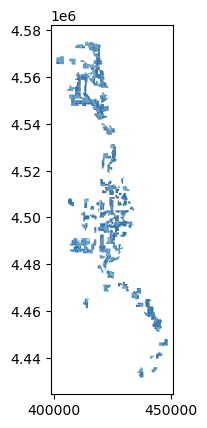

In [19]:
gdf_future_land_use_2050_filtered = gdf_future_land_use_2050[gdf_future_land_use_2050['TAZID_900'].isin(taz_list)].copy()

# Calculate the area in square meters
gdf_future_land_use_2050_filtered['sqmf'] = gdf_future_land_use_2050_filtered.geometry.area

gdf_future_land_use_2050_filtered['acresf'] = gdf_future_land_use_2050_filtered['sqmf'] / 4046.85642

# Define the conditions
condition_HH = (gdf_future_land_use_2050_filtered['sf'] + gdf_future_land_use_2050_filtered['mf']) >= 1
condition_EMP = gdf_future_land_use_2050_filtered[['ind', 'retail', 'office', 'govt', 'mixed', 'other']].sum(axis=1) > 0

# Define the condition for no build

# Define the condition - SF =1 and others =0
condition_no_change = _config.get_condition_no_change(gdf_future_land_use_2050_filtered)
condition_no_build = _config.get_condition_no_build(gdf_future_land_use_2050_filtered, 'TAZID_900')

# Calculate the area and assign it to the new column
gdf_future_land_use_2050_filtered['dev_status'] = np.where(
    condition_no_build, 'no_build', 
    np.where(condition_no_change, 'no_change', 'changeable')
)

gdf_future_land_use_2050_filtered['acresf_nb'] = np.where(condition_no_build                        , gdf_future_land_use_2050_filtered['acresf'], 0)
gdf_future_land_use_2050_filtered['acresf_nc'] = np.where(condition_no_change                       , gdf_future_land_use_2050_filtered['acresf'], 0)
gdf_future_land_use_2050_filtered['acresf_ch'] = np.where(~condition_no_build & ~condition_no_change, gdf_future_land_use_2050_filtered['acresf'], 0)

# Check if condition is met and assign boolean values
gdf_future_land_use_2050_filtered['HH'] = condition_HH
gdf_future_land_use_2050_filtered['EMP'] = condition_EMP

display(gdf_future_land_use_2050_filtered)
gdf_future_land_use_2050_filtered.plot()

In [20]:
gdf_future_land_use_2050_filtered[gdf_future_land_use_2050_filtered['TAZID_900']==669]

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,...,no_build,geometry,sqmf,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch,HH,EMP
263,0,265.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((410637.004 4551111.898, 410637.006 4...",3419.631141,0.845009,no_build,0.845009,0.0,0.000000,False,False
1040,0,1110.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411175.861 4551152.430, 411227.534 4...",197401.166753,48.778891,no_build,48.778891,0.0,0.000000,False,False
1041,0,1111.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411783.075 4550803.440, 411782.948 4...",1807.005649,0.446521,no_build,0.446521,0.0,0.000000,False,False
1042,0,1112.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411783.075 4550803.440, 411782.948 4...",6535.061685,1.614849,no_build,1.614849,0.0,0.000000,False,False
1043,0,1113.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411675.232 4551551.256, 411676.068 4...",66151.557288,16.346406,no_build,16.346406,0.0,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659366,0,712981.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((410904.248 4551556.253, 410995.848 4...",22006.152418,5.437839,changeable,0.000000,0.0,5.437839,True,True
659367,0,712982.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((410995.848 4551315.483, 410995.848 4...",22006.140414,5.437836,changeable,0.000000,0.0,5.437836,True,True
659368,0,712983.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((410995.848 4551435.391, 410995.848 4...",22006.148334,5.437838,changeable,0.000000,0.0,5.437838,True,True
660304,0,713925.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((411175.861 4551152.430, 411180.607 4...",37915.237559,9.369059,changeable,0.000000,0.0,9.369059,True,True


# Calculate Percent Changeable

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,...,other,year,no_build,geometry,sqmf,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,...,0.0,2023.0,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4...",1251.309576,0.309205,changeable,0.000000,0.0,0.309205
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2019.0,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4...",25971.284449,6.417644,no_build,6.417644,0.0,0.000000
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,...,0.0,2019.0,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4...",4296.110445,1.061592,changeable,0.000000,0.0,1.061592
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,...,0.0,2023.0,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4...",4568.716190,1.128954,changeable,0.000000,0.0,1.128954
6,0,7.0,0.0,756.0,0.0,0.5,0.0,0.0,1.0,0.0,...,0.0,2019.0,0.0,"POLYGON ((420273.975 4542582.973, 420319.645 4...",30226.635185,7.469164,changeable,0.000000,0.0,7.469164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712230,0,766661.0,0.0,2138.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2019.0,1.0,"POLYGON ((422456.533 4483123.383, 422457.800 4...",716724.279491,177.106427,changeable,0.000000,0.0,177.106427
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2019.0,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4...",681233.696496,168.336513,changeable,0.000000,0.0,168.336513
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,...,0.0,2023.0,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4...",128050.560835,31.641983,changeable,0.000000,0.0,31.641983
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2019.0,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4...",412557.123630,101.945085,changeable,0.000000,0.0,101.945085


<AxesSubplot:>

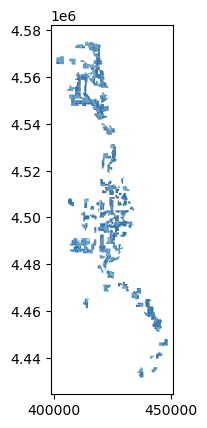

In [21]:
gdf_future_land_use_2023_filtered = gdf_future_land_use_2023[gdf_future_land_use_2023['TAZID_900'].isin(taz_list)].copy()

# Calculate the area in square meters
gdf_future_land_use_2023_filtered['sqmf'] = gdf_future_land_use_2023_filtered.geometry.area

gdf_future_land_use_2023_filtered['acresf'] = gdf_future_land_use_2023_filtered['sqmf'] / 4046.85642

# Define the condition - SF =1 and others =0
condition_no_change = _config.get_condition_no_change(gdf_future_land_use_2023_filtered)
condition_no_build = _config.get_condition_no_build(gdf_future_land_use_2023_filtered, 'TAZID_900')

# Calculate the area and assign it to the new column
gdf_future_land_use_2023_filtered['dev_status'] = np.where(
    condition_no_build, 'no_build', 
    np.where(condition_no_change, 'no_change', 'changeable')
)

gdf_future_land_use_2023_filtered['acresf_nb'] = np.where(condition_no_build                        , gdf_future_land_use_2023_filtered['acresf'], 0)
gdf_future_land_use_2023_filtered['acresf_nc'] = np.where(condition_no_change                       , gdf_future_land_use_2023_filtered['acresf'], 0)
gdf_future_land_use_2023_filtered['acresf_ch'] = np.where(~condition_no_build & ~condition_no_change, gdf_future_land_use_2023_filtered['acresf'], 0)

display(gdf_future_land_use_2023_filtered)
gdf_future_land_use_2023_filtered.plot()

C:\Users\bhereth\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1803: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
C:\Users\bhereth\AppData\Local\Temp\ipykernel_14252\3389738139.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 283 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_centers_flu_23 = gpd.overlay(centers_taz_gdf, gdf_future_land_use_2023_filtered, how='union')


,AreaName,AreaType,Area,TAZID,CO_FIPS,TAZACRES,sqm,acres,Id,parcel_id,...,dev_status,acresf_nb,acresf_nc,acresf_ch,geometry,sqmu,acresu,acresu_nb,acresu_nc,acresu_ch
0,Crossroads,City Center,Utah County,2496.0,49.0,165.490872,306078.979084,75.633763,0.0,465709.0,...,changeable,0.0,0.0,0.283978,"POLYGON ((421794.158 4469153.979, 421794.184 4...",1.149217e+03,2.839778e-01,0.0,0.0,2.839778e-01
1,Crossroads,City Center,Utah County,2496.0,49.0,165.490872,306078.979084,75.633763,0.0,466119.0,...,changeable,0.0,0.0,2.012116,"POLYGON ((421660.106 4469167.747, 421669.963 4...",3.053886e+03,7.546317e-01,0.0,0.0,7.546317e-01
2,Crossroads,City Center,Utah County,2505.0,49.0,76.823967,167718.011467,41.444023,0.0,466119.0,...,changeable,0.0,0.0,2.012116,"POLYGON ((422212.202 4469434.222, 422214.197 4...",2.779906e+02,6.869298e-02,0.0,0.0,6.869298e-02
3,Crossroads,City Center,Utah County,2498.0,49.0,112.631810,268457.440292,66.337278,0.0,466119.0,...,changeable,0.0,0.0,2.012116,"POLYGON ((422212.077 4469257.318, 422203.170 4...",4.519210e+03,1.116721e+00,0.0,0.0,1.116721e+00
4,Crossroads,City Center,Utah County,2496.0,49.0,165.490872,306078.979084,75.633763,0.0,478913.0,...,changeable,0.0,0.0,0.998892,"POLYGON ((422054.184 4468654.680, 422053.917 4...",4.042372e+03,9.988919e-01,0.0,0.0,9.988919e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231493,NaN,NaN,NaN,874.0,NaN,NaN,NaN,NaN,0.0,766660.0,...,changeable,0.0,0.0,5.126096,"POLYGON ((421613.594 4523745.639, 421612.731 4...",1.309740e+02,3.236438e-02,0.0,0.0,3.236438e-02
231494,NaN,NaN,NaN,2149.0,NaN,NaN,NaN,NaN,0.0,766662.0,...,changeable,0.0,0.0,168.336513,"POLYGON ((423507.408 4482116.360, 423510.708 4...",3.945048e+01,9.748426e-03,0.0,0.0,9.748426e-03
231495,NaN,NaN,NaN,2153.0,NaN,NaN,NaN,NaN,0.0,766665.0,...,changeable,0.0,0.0,31.641983,"POLYGON ((424361.724 4482434.549, 424371.322 4...",1.446954e+04,3.575501e+00,0.0,0.0,3.575501e+00
231496,NaN,NaN,NaN,2141.0,NaN,NaN,NaN,NaN,0.0,766663.0,...,changeable,0.0,0.0,101.945085,"POLYGON ((423945.728 4483679.993, 423945.579 4...",1.300618e-11,3.213898e-15,0.0,0.0,3.213898e-15


<AxesSubplot:>

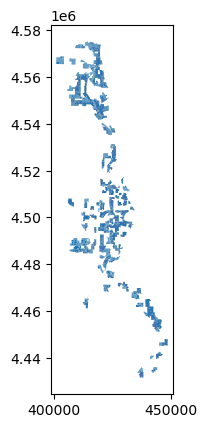

In [22]:
# Perform the intersection of the first two GeoDataFrames
gdf_centers_flu_23 = gpd.overlay(centers_taz_gdf, gdf_future_land_use_2023_filtered, how='union')

# drop non-parcel areas from union
gdf_centers_flu_23 = gdf_centers_flu_23.dropna(subset=['parcel_id'])

# Calculate the area in square meters
gdf_centers_flu_23['sqmu'] = gdf_centers_flu_23.geometry.area

# Convert the area to acres
gdf_centers_flu_23['acresu'] = gdf_centers_flu_23['sqmu'] / 4046.85642

# Define the condition - SF =1 and others =0
condition_no_change = _config.get_condition_no_change(gdf_centers_flu_23)
condition_no_build = _config.get_condition_no_build(gdf_centers_flu_23, 'TAZID_900')

# Calculate the area and assign it to the new column
gdf_centers_flu_23['dev_status'] = np.where(
    condition_no_build, 'no_build', 
    np.where(condition_no_change, 'no_change', 'changeable')
)

gdf_centers_flu_23['acresu_nb'] = np.where(condition_no_build                        , gdf_centers_flu_23['acresu'], 0)
gdf_centers_flu_23['acresu_nc'] = np.where(condition_no_change                       , gdf_centers_flu_23['acresu'], 0)
gdf_centers_flu_23['acresu_ch'] = np.where(~condition_no_build & ~condition_no_change, gdf_centers_flu_23['acresu'], 0)


# fill null TAZID with value from FLU
gdf_centers_flu_23['TAZID'].fillna(gdf_centers_flu_23['TAZID_900'], inplace=True)

# The final_intersection GeoDataFrame now contains the intersection of all three GeoDataFrames
display(gdf_centers_flu_23)
gdf_centers_flu_23.plot()

In [45]:
import numpy as np

gdf_centers_flu_23_sum_acres = gdf_centers_flu_23.groupby(['TAZID', 'AreaName', 'AreaType'], as_index=False).agg(acresu     = ('acresu'   ,'sum'),
                                                                                                                 acresu_nb  = ('acresu_nb','sum'),
                                                                                                                 acresu_nc  = ('acresu_nc','sum'),
                                                                                                                 acresu_ch  = ('acresu_ch','sum'))

gdf_centers_flu_23_sum_acres['pctu_nb'] = gdf_centers_flu_23_sum_acres['acresu_nb'] / gdf_centers_flu_23_sum_acres['acresu']
gdf_centers_flu_23_sum_acres['pctu_nc'] = gdf_centers_flu_23_sum_acres['acresu_nc'] / gdf_centers_flu_23_sum_acres['acresu']
gdf_centers_flu_23_sum_acres['pctu_ch'] = gdf_centers_flu_23_sum_acres['acresu_ch'] / gdf_centers_flu_23_sum_acres['acresu']

gdf_centers_flu_23_sum_acres['pctu_nb'].fillna(0, inplace=True)
gdf_centers_flu_23_sum_acres['pctu_nc'].fillna(0, inplace=True)
gdf_centers_flu_23_sum_acres['pctu_ch'].fillna(0, inplace=True)

gdf_centers_flu_23_sum_acres

,TAZID,AreaName,AreaType,acresu,acresu_nb,acresu_nc,acresu_ch,pctu_nb,pctu_nc,pctu_ch
0,170.0,West Warren Center,Neighborhood Center,5.267270,0.000000,5.267270,0.000000,0.000000,1.000000,0.000000
1,171.0,West Warren Center,Neighborhood Center,5.248360,0.000000,5.248360,0.000000,0.000000,1.000000,0.000000
2,174.0,West Weber,Neighborhood Center,9.532562,0.000000,0.000000,9.532562,0.000000,0.000000,1.000000
3,175.0,West Weber,Neighborhood Center,8.584710,0.000000,2.165073,6.419637,0.000000,0.252201,0.747799
4,176.0,West 12th Street,Neighborhood Center,59.927995,0.049517,59.878477,0.000000,0.000826,0.999174,0.000000
...,...,...,...,...,...,...,...,...,...,...
1133,3388.0,Salem,Neighborhood Center,17.692567,10.664278,7.028288,0.000000,0.602755,0.397245,0.000000
1134,3394.0,Salem,Neighborhood Center,12.994979,0.000000,12.994979,0.000000,0.000000,1.000000,0.000000
1135,3405.0,Salem,Neighborhood Center,5.208681,0.000000,5.208681,0.000000,0.000000,1.000000,0.000000
1136,3406.0,Salem,Neighborhood Center,12.547911,0.000000,12.547911,0.000000,0.000000,1.000000,0.000000


In [46]:
gdf_centers_flu_23[gdf_centers_flu_23['dev_status']=='no_change']

,AreaName,AreaType,Area,TAZID,CO_FIPS,TAZACRES,sqm,acres,Id,parcel_id,...,dev_status,acresf_nb,acresf_nc,acresf_ch,geometry,sqmu,acresu,acresu_nb,acresu_nc,acresu_ch
99,Crossroads,City Center,Utah County,2498.0,49.0,112.631810,268457.440292,66.337278,0.0,492054.0,...,no_change,0.0,0.368362,0.0,"POLYGON ((421601.384 4469567.029, 421614.294 4...",145.029007,0.035837,0.0,0.035837,0.0
100,Crossroads,City Center,Utah County,2498.0,49.0,112.631810,268457.440292,66.337278,0.0,492184.0,...,no_change,0.0,0.252334,0.0,"POLYGON ((421604.513 4469545.755, 421605.436 4...",0.645888,0.000160,0.0,0.000160,0.0
115,Crossroads,City Center,Utah County,2511.0,49.0,166.928126,288097.903715,71.190542,0.0,463693.0,...,no_change,0.0,0.140521,0.0,"POLYGON ((422265.347 4469790.951, 422265.243 4...",568.667834,0.140521,0.0,0.140521,0.0
116,Crossroads,City Center,Utah County,2511.0,49.0,166.928126,288097.903715,71.190542,0.0,463792.0,...,no_change,0.0,0.139213,0.0,"POLYGON ((422265.983 4469903.040, 422265.879 4...",563.376020,0.139213,0.0,0.139213,0.0
117,Crossroads,City Center,Utah County,2511.0,49.0,166.928126,288097.903715,71.190542,0.0,463855.0,...,no_change,0.0,0.137610,0.0,"POLYGON ((422311.574 4469751.150, 422311.682 4...",556.888066,0.137610,0.0,0.137610,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231458,NaN,NaN,NaN,3407.0,NaN,NaN,NaN,NaN,0.0,763258.0,...,no_change,0.0,0.010080,0.0,"POLYGON ((443396.486 4435047.533, 443397.363 4...",40.792257,0.010080,0.0,0.010080,0.0
231467,NaN,NaN,NaN,3158.0,NaN,NaN,NaN,NaN,0.0,763735.0,...,no_change,0.0,0.021302,0.0,"POLYGON ((441500.777 4440035.661, 441500.658 4...",31.042918,0.007671,0.0,0.007671,0.0
231468,NaN,NaN,NaN,3158.0,NaN,NaN,NaN,NaN,0.0,763736.0,...,no_change,0.0,0.021302,0.0,"POLYGON ((441500.777 4440035.661, 441500.658 4...",31.042918,0.007671,0.0,0.007671,0.0
231469,NaN,NaN,NaN,3080.0,NaN,NaN,NaN,NaN,0.0,763773.0,...,no_change,0.0,0.015268,0.0,"POLYGON ((445724.821 4445436.087, 445724.822 4...",61.785465,0.015268,0.0,0.015268,0.0


In [47]:
dfTemp = pd.DataFrame(gdf_centers_flu_23[(gdf_centers_flu_23['TAZID']==1384)])
dfTemp

,AreaName,AreaType,Area,TAZID,CO_FIPS,TAZACRES,sqm,acres,Id,parcel_id,...,dev_status,acresf_nb,acresf_nc,acresf_ch,geometry,sqmu,acresu,acresu_nb,acresu_nc,acresu_ch
30675,Fairbourne Station,Urban Center,WFRC MPO,1384.0,35.0,96.889876,331540.63668,81.925476,0.0,36376.0,...,changeable,0.000000,0.0,2.166356,"POLYGON ((419350.755 4505418.059, 419371.443 4...",8766.933419,2.166356,0.000000,0.0,2.166356
30676,Fairbourne Station,Urban Center,WFRC MPO,1384.0,35.0,96.889876,331540.63668,81.925476,0.0,36382.0,...,changeable,0.000000,0.0,2.118750,"POLYGON ((419385.955 4505041.058, 419384.310 4...",8574.278999,2.118750,0.000000,0.0,2.118750
30677,Fairbourne Station,Urban Center,WFRC MPO,1384.0,35.0,96.889876,331540.63668,81.925476,0.0,39051.0,...,changeable,0.000000,0.0,0.306983,"POLYGON ((419473.024 4504884.698, 419458.485 4...",1242.316702,0.306983,0.000000,0.0,0.306983
30678,Fairbourne Station,Urban Center,WFRC MPO,1384.0,35.0,96.889876,331540.63668,81.925476,0.0,39052.0,...,changeable,0.000000,0.0,0.572662,"POLYGON ((419471.664 4504726.723, 419456.867 4...",2317.478884,0.572662,0.000000,0.0,0.572662
30679,Fairbourne Station,Urban Center,WFRC MPO,1384.0,35.0,96.889876,331540.63668,81.925476,0.0,39535.0,...,changeable,0.000000,0.0,0.118585,"POLYGON ((419256.772 4504817.085, 419251.952 4...",479.897151,0.118585,0.000000,0.0,0.118585
30680,Fairbourne Station,Urban Center,WFRC MPO,1384.0,35.0,96.889876,331540.63668,81.925476,0.0,39536.0,...,changeable,0.000000,0.0,0.082190,"POLYGON ((419250.814 4504726.197, 419247.432 4...",325.030261,0.080317,0.000000,0.0,0.080317
30681,Fairbourne Station,Urban Center,WFRC MPO,1384.0,35.0,96.889876,331540.63668,81.925476,0.0,40507.0,...,changeable,0.000000,0.0,0.700401,"POLYGON ((419077.597 4504970.648, 419139.000 4...",2834.422714,0.700401,0.000000,0.0,0.700401
30682,Fairbourne Station,Urban Center,WFRC MPO,1384.0,35.0,96.889876,331540.63668,81.925476,0.0,40602.0,...,changeable,0.000000,0.0,2.400900,"POLYGON ((419175.781 4504838.146, 419094.324 4...",9716.096181,2.400900,0.000000,0.0,2.400900
30683,Fairbourne Station,Urban Center,WFRC MPO,1384.0,35.0,96.889876,331540.63668,81.925476,0.0,40825.0,...,changeable,0.000000,0.0,0.899928,"POLYGON ((419515.548 4504910.502, 419516.175 4...",3506.168973,0.866393,0.000000,0.0,0.866393
30684,Fairbourne Station,Urban Center,WFRC MPO,1384.0,35.0,96.889876,331540.63668,81.925476,0.0,40826.0,...,changeable,0.000000,0.0,1.837393,"POLYGON ((419518.723 4504777.681, 419519.695 4...",7187.431585,1.776053,0.000000,0.0,1.776053


In [48]:
gdf_centers_flu_23_sum_acres[['TAZID', 'AreaName', 'AreaType', 'pctu_ch']].to_csv('intermediate/percent-changeable.csv', index=False)
print('Exported!')

Exported!


# Calcuate portion of TAZ HH and EMP

C:\Users\bhereth\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1803: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
C:\Users\bhereth\AppData\Local\Temp\ipykernel_14252\79792386.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 283 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_centers_flu_50 = gpd.overlay(centers_taz_gdf, gdf_future_land_use_2050_filtered, how='union')


,AreaName,AreaType,Area,TAZID,CO_FIPS,TAZACRES,sqm,acres,Id,parcel_id,...,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch,HH,EMP,geometry,sqmu,acresu
0,Crossroads,City Center,Utah County,2496.0,49.0,165.490872,306078.979084,75.633763,0.0,465709.0,...,0.283978,changeable,0.0,0.0,0.283978,False,True,"POLYGON ((421794.158 4469153.979, 421794.184 4...",1.149217e+03,2.839778e-01
1,Crossroads,City Center,Utah County,2496.0,49.0,165.490872,306078.979084,75.633763,0.0,466119.0,...,2.012116,changeable,0.0,0.0,2.012116,False,True,"POLYGON ((421660.106 4469167.747, 421669.963 4...",3.053886e+03,7.546317e-01
2,Crossroads,City Center,Utah County,2505.0,49.0,76.823967,167718.011467,41.444023,0.0,466119.0,...,2.012116,changeable,0.0,0.0,2.012116,False,True,"POLYGON ((422212.202 4469434.222, 422214.197 4...",2.779906e+02,6.869298e-02
3,Crossroads,City Center,Utah County,2498.0,49.0,112.631810,268457.440292,66.337278,0.0,466119.0,...,2.012116,changeable,0.0,0.0,2.012116,False,True,"POLYGON ((422212.077 4469257.318, 422203.170 4...",4.519210e+03,1.116721e+00
4,Crossroads,City Center,Utah County,2496.0,49.0,165.490872,306078.979084,75.633763,0.0,478913.0,...,0.998892,changeable,0.0,0.0,0.998892,False,True,"POLYGON ((422054.184 4468654.680, 422053.917 4...",4.042372e+03,9.988919e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231493,NaN,NaN,NaN,874.0,NaN,NaN,NaN,NaN,0.0,766660.0,...,5.126096,changeable,0.0,0.0,5.126096,True,True,"POLYGON ((421613.594 4523745.639, 421612.731 4...",1.309740e+02,3.236438e-02
231494,NaN,NaN,NaN,2149.0,NaN,NaN,NaN,NaN,0.0,766662.0,...,168.336513,changeable,0.0,0.0,168.336513,False,False,"POLYGON ((423507.408 4482116.360, 423510.708 4...",3.945048e+01,9.748426e-03
231495,NaN,NaN,NaN,2153.0,NaN,NaN,NaN,NaN,0.0,766665.0,...,31.641983,changeable,0.0,0.0,31.641983,True,True,"POLYGON ((424361.724 4482434.549, 424371.322 4...",1.446954e+04,3.575501e+00
231496,NaN,NaN,NaN,2141.0,NaN,NaN,NaN,NaN,0.0,766663.0,...,101.945085,changeable,0.0,0.0,101.945085,False,False,"POLYGON ((423945.728 4483679.993, 423945.579 4...",1.300618e-11,3.213898e-15


<AxesSubplot:>

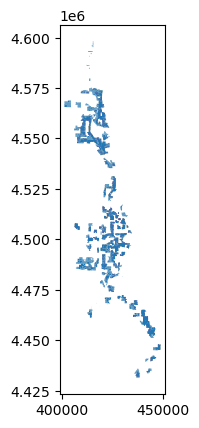

In [49]:
# Perform the intersection of the first two GeoDataFrames
gdf_centers_flu_50 = gpd.overlay(centers_taz_gdf, gdf_future_land_use_2050_filtered, how='union')

# Calculate the area in square meters
gdf_centers_flu_50['sqmu'] = gdf_centers_flu_50.geometry.area

# Convert the area to acres
gdf_centers_flu_50['acresu'] = gdf_centers_flu_50['sqmu'] / 4046.85642

# fill null TAZID with value from FLU
gdf_centers_flu_50['TAZID'].fillna(gdf_centers_flu_50['TAZID_900'], inplace=True)

# The final_intersection GeoDataFrame now contains the intersection of all three GeoDataFrames
display(gdf_centers_flu_50)
gdf_centers_flu_50.plot()

<AxesSubplot:>

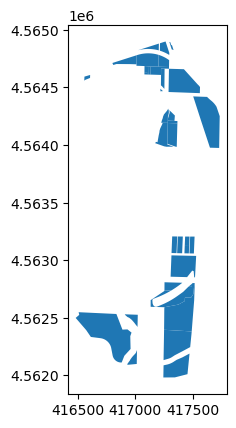

In [50]:
gdf_centers_flu_50[(gdf_centers_flu_50['TAZID'].isin([367,388])) & (gdf_centers_flu_50['EMP']==True)].plot()

In [51]:
# Step 1: Calculate the total sum of acresu for each TAZID
total_acresu_by_tazid = gdf_centers_flu_50[gdf_centers_flu_50['HH'] == True].groupby('TAZID', as_index=False).agg(total_acresu=('acresu', 'sum'))

df_stops_flu_50_HH_areas = gdf_centers_flu_50.copy()

df_stops_flu_50_HH_areas['variable'] = 'TOTHH'

# Step 2: Group by TAZID, N, and project_id and calculate the sum of acresu for HH==True
df_stops_flu_50_HH_areas = df_stops_flu_50_HH_areas[df_stops_flu_50_HH_areas['HH'] == True].groupby(['TAZID', 'AreaName', 'AreaType', 'variable'], as_index=False).agg(acresu_sum=('acresu', 'sum'))

# Step 3: Merge the total sum back to the grouped DataFrame
df_stops_flu_50_HH_areas = df_stops_flu_50_HH_areas.merge(total_acresu_by_tazid, on='TAZID', how='left')

# Step 4: Perform the division
df_stops_flu_50_HH_areas['ratio_of_taz'] = df_stops_flu_50_HH_areas['acresu_sum'] / df_stops_flu_50_HH_areas['total_acresu']

# Display the resulting DataFrame
df_stops_flu_50_HH_areas

,TAZID,AreaName,AreaType,variable,acresu_sum,total_acresu,ratio_of_taz
0,170.0,West Warren Center,Neighborhood Center,TOTHH,5.267270,349.168196,0.015085
1,171.0,West Warren Center,Neighborhood Center,TOTHH,5.248360,613.597697,0.008553
2,174.0,West Weber,Neighborhood Center,TOTHH,9.532562,149.324806,0.063838
3,175.0,West Weber,Neighborhood Center,TOTHH,8.584710,138.732163,0.061880
4,176.0,West 12th Street,Neighborhood Center,TOTHH,59.878477,264.339455,0.226521
...,...,...,...,...,...,...,...
1043,3388.0,Salem,Neighborhood Center,TOTHH,7.028288,130.891581,0.053695
1044,3394.0,Salem,Neighborhood Center,TOTHH,12.994979,58.859026,0.220781
1045,3405.0,Salem,Neighborhood Center,TOTHH,5.208681,54.975351,0.094746
1046,3406.0,Salem,Neighborhood Center,TOTHH,12.547911,74.410975,0.168630


In [52]:
# Step 1: Calculate the total sum of area_acresu for each TAZID
total_acres_flu_by_tazid_50_emp = gdf_centers_flu_50[gdf_centers_flu_50['EMP'] == True].groupby('TAZID', as_index=False).agg(total_acresu=('acresu', 'sum'))

df_stops_flu_50_EMP_areas = gdf_centers_flu_50.copy()

df_stops_flu_50_EMP_areas['variable'] = 'TOTEMP'

# Step 2: Group by TAZID, N, and project_id and calculate the sum of acresu for EMP==True
df_stops_flu_50_EMP_areas = df_stops_flu_50_EMP_areas[df_stops_flu_50_EMP_areas['EMP'] == True].groupby(['TAZID', 'AreaName', 'AreaType', 'variable'], as_index=False).agg(acresu_sum=('acresu', 'sum'))

# Step 3: Merge the total sum back to the grouped DataFrame
df_stops_flu_50_EMP_areas = df_stops_flu_50_EMP_areas.merge(total_acres_flu_by_tazid_50_emp, on='TAZID', how='left')

# Step 4: Perform the division
df_stops_flu_50_EMP_areas['ratio_of_taz'] = df_stops_flu_50_EMP_areas['acresu_sum'] / df_stops_flu_50_EMP_areas['total_acresu']

# Display the resulting DataFrame
df_stops_flu_50_EMP_areas

,TAZID,AreaName,AreaType,variable,acresu_sum,total_acresu,ratio_of_taz
0,170.0,West Warren Center,Neighborhood Center,TOTEMP,4.000218,120.984208,0.033064
1,171.0,West Warren Center,Neighborhood Center,TOTEMP,1.641890,1.641890,1.000000
2,174.0,West Weber,Neighborhood Center,TOTEMP,9.532562,11.730075,0.812660
3,175.0,West Weber,Neighborhood Center,TOTEMP,6.419637,9.447484,0.679508
4,176.0,West 12th Street,Neighborhood Center,TOTEMP,57.618267,79.406393,0.725612
...,...,...,...,...,...,...,...
1052,3351.0,Payson Main Street,City Center,TOTEMP,16.042544,24.954444,0.642873
1053,3352.0,Payson Main Street,City Center,TOTEMP,1.070678,3.797540,0.281940
1054,3353.0,Payson Main Street,City Center,TOTEMP,0.066747,12.630763,0.005284
1055,3364.0,Payson Main Street,City Center,TOTEMP,1.139774,12.491127,0.091247


In [53]:
df_stops_flu_50_areas = pd.concat([df_stops_flu_50_HH_areas, df_stops_flu_50_EMP_areas])
df_stops_flu_50_areas = df_stops_flu_50_areas[['TAZID', 'AreaName','AreaType','variable','ratio_of_taz']]
df_stops_flu_50_areas

,TAZID,AreaName,AreaType,variable,ratio_of_taz
0,170.0,West Warren Center,Neighborhood Center,TOTHH,0.015085
1,171.0,West Warren Center,Neighborhood Center,TOTHH,0.008553
2,174.0,West Weber,Neighborhood Center,TOTHH,0.063838
3,175.0,West Weber,Neighborhood Center,TOTHH,0.061880
4,176.0,West 12th Street,Neighborhood Center,TOTHH,0.226521
...,...,...,...,...,...
1052,3351.0,Payson Main Street,City Center,TOTEMP,0.642873
1053,3352.0,Payson Main Street,City Center,TOTEMP,0.281940
1054,3353.0,Payson Main Street,City Center,TOTEMP,0.005284
1055,3364.0,Payson Main Street,City Center,TOTEMP,0.091247


In [54]:
df_stops_flu_50_areas

,TAZID,AreaName,AreaType,variable,ratio_of_taz
0,170.0,West Warren Center,Neighborhood Center,TOTHH,0.015085
1,171.0,West Warren Center,Neighborhood Center,TOTHH,0.008553
2,174.0,West Weber,Neighborhood Center,TOTHH,0.063838
3,175.0,West Weber,Neighborhood Center,TOTHH,0.061880
4,176.0,West 12th Street,Neighborhood Center,TOTHH,0.226521
...,...,...,...,...,...
1052,3351.0,Payson Main Street,City Center,TOTEMP,0.642873
1053,3352.0,Payson Main Street,City Center,TOTEMP,0.281940
1054,3353.0,Payson Main Street,City Center,TOTEMP,0.005284
1055,3364.0,Payson Main Street,City Center,TOTEMP,0.091247


In [55]:
df_stops_flu_50_areas[df_stops_flu_50_areas['TAZID']==165]

,TAZID,AreaName,AreaType,variable,ratio_of_taz


In [56]:
df_stops_flu_50_areas_pivot = df_stops_flu_50_areas.pivot(index=['TAZID', 'AreaName', 'AreaType'], columns='variable', values='ratio_of_taz')
df_stops_flu_50_areas_pivot.reset_index(inplace=True)
df_stops_flu_50_areas_pivot.fillna(0,inplace=True)
df_stops_flu_50_areas_pivot.to_csv('intermediate/parameter-area-ratio-of-taz.csv', index=False)
print('Exported!')

Exported!


In [57]:
import geopandas as gpd

# Dissolve based on 'dev_status' attribute
dissolved_2023 = gdf_future_land_use_2023_filtered.dissolve(by=['dev_status'])

# Explode MultiPolygons into individual Polygons
dissolved_2023 = dissolved_2023.explode(index_parts=True)

# Reset index to clean up the GeoDataFrame
dissolved_2023 = dissolved_2023.reset_index()

# Project to UTM Zone 12N (EPSG:26912) for accurate simplification
dissolved_2023 = dissolved_2023.to_crs(epsg=26912)

# Simplify polygons with a specified tolerance (adjust tolerance as needed)
tolerance = 10  # meters
dissolved_2023['geometry'] = dissolved_2023['geometry'].simplify(tolerance, preserve_topology=True)

# Reproject back to WGS 84 (EPSG:4326) for export
dissolved_2023 = dissolved_2023.to_crs(epsg=4326)

# Export to GeoJSON
dissolved_2023[['dev_status', 'geometry']].to_file('_site/data/future_land_use_2023_filtered.geojson', driver='GeoJSON')


In [58]:
dissolved_2023[dissolved_2023['dev_status']=='no_change']

,dev_status,level_1,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,...,mixed,other,year,no_build,sqmf,acresf,acresf_nb,acresf_nc,acresf_ch,geometry
12586,no_change,0,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-112.10495 40.69663, -112.10500 40.6..."
12587,no_change,1,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-112.10520 40.69670, -112.10561 40.6..."
12588,no_change,2,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-112.10659 40.69832, -112.10931 40.6..."
12589,no_change,3,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-112.10427 40.69794, -112.10462 40.6..."
12590,no_change,4,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-112.10531 40.69876, -112.10650 40.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24828,no_change,12242,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-111.61036 40.17868, -111.60937 40.1..."
24829,no_change,12243,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-111.60325 40.17846, -111.60358 40.1..."
24830,no_change,12244,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-111.60325 40.17861, -111.60358 40.1..."
24831,no_change,12245,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-111.60411 40.17886, -111.60411 40.1..."
